Estudie el programa SVM con todo detalle, mejore su documentación y con base en el haga
cambios para una aplicación.

Despues de analizar el programa SVM se reescribio para aplicarlo en la clasificacion del tamaño de papas.

Generando datos sintéticos...
Datos generados exitosamente.

Entrenando el modelo SVM...
Modelo entrenado correctamente.

Generando gráfico de clasificación...
Calculando la frontera de decisión...
Frontera de decisión calculada y graficada.

Guardando figura: svm_papas_decision_boundary


FileNotFoundError: [Errno 2] No such file or directory: 'images/svm_papas_decision_boundary.png'

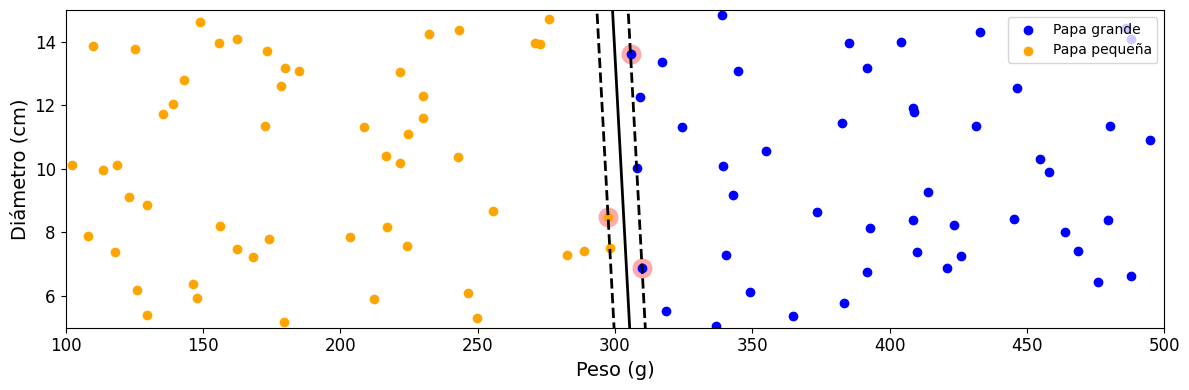

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets

# Configuración global para gráficos
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Función para guardar figuras
def save_fig(fig_id, tight_layout=True):
    """Guarda la figura con el identificador dado."""
    print(f"Guardando figura: {fig_id}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(f"images/{fig_id}.png", format='png', dpi=300)
    print("Figura guardada exitosamente.\n")

# Datos sintéticos de clasificación de papas según peso y diámetro
print("Generando datos sintéticos...")
np.random.seed(42)
num_samples = 100
peso = np.random.uniform(100, 500, num_samples)  # Peso en gramos
diametro = np.random.uniform(5, 15, num_samples)  # Diámetro en cm
X = np.column_stack((peso, diametro))

# Etiquetas: 0 para papas pequeñas, 1 para papas grandes
y = (peso > 300).astype(int)
print("Datos generados exitosamente.\n")

# Entrenar modelo SVM con kernel lineal
print("Entrenando el modelo SVM...")
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
print("Modelo entrenado correctamente.\n")

# Función para graficar la frontera de decisión del SVM
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    """Grafica la frontera de decisión de un clasificador SVM."""
    print("Calculando la frontera de decisión...")
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    print("Frontera de decisión calculada y graficada.\n")

# Visualización de datos y frontera de decisión
print("Generando gráfico de clasificación...")
plt.figure(figsize=(12, 4))
plot_svc_decision_boundary(svm_clf, 100, 500)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c="blue", label="Papa grande")
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c="orange", label="Papa pequeña")
plt.xlabel("Peso (g)")
plt.ylabel("Diámetro (cm)")
plt.legend()
plt.axis([100, 500, 5, 15])

save_fig("svm_papas_decision_boundary")
print("Mostrando gráfico final...")
plt.show()
print("Proceso finalizado con éxito.")
